In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(seed=2017)

In [212]:
#reading data set
dataset=pd.read_csv('loan-prediction.csv')

In [213]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


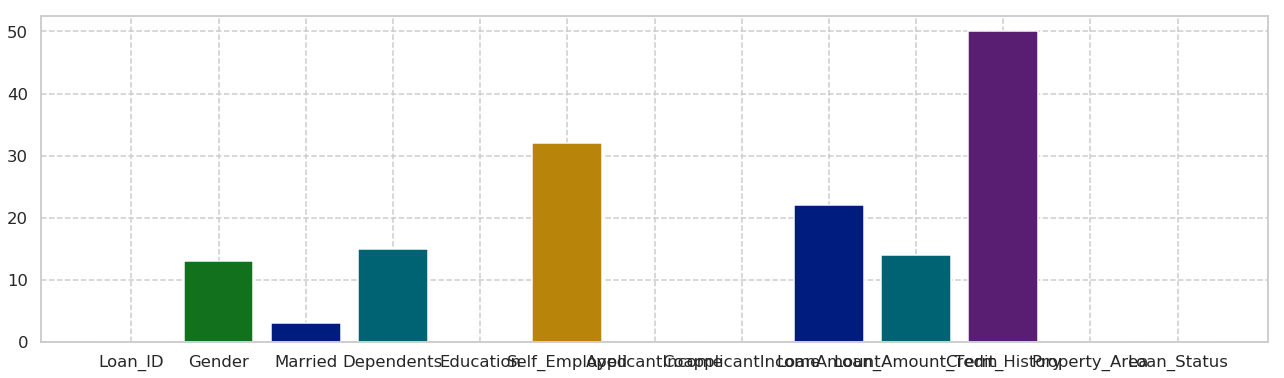

In [214]:
values=list(dataset.apply(lambda x:sum(x.isnull()),axis=0))
colors=['r', 'g', 'b', 'c', 'm','y','r', 'g', 'b', 'c', 'm','y','r']
fig= plt.figure(figsize=(22,6))
plt.bar(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                         'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area',
                        'Loan_Status'], values, color= colors)
fig.show()

In [215]:
#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [216]:
dataset=d
dataset['LoanAmount'].fillna(np.nanmedian(dataset.LoanAmount),inplace=True)
dataset['Loan_Amount_Term'].fillna(np.nanmedian(dataset.Loan_Amount_Term),inplace=True)
dataset['Credit_History'].fillna(np.nanmedian(dataset.Credit_History),inplace=True)
dataset['Dependents'].fillna(np.nanmedian(dataset.Dependents),inplace=True)
dataset['Gender'].fillna(np.nanmedian(dataset.Gender),inplace=True)
dataset['Married'].fillna(np.nanmedian(dataset.Married),inplace=True)
dataset['Self_Employed'].fillna(np.nanmedian(dataset.Self_Employed),inplace=True)

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


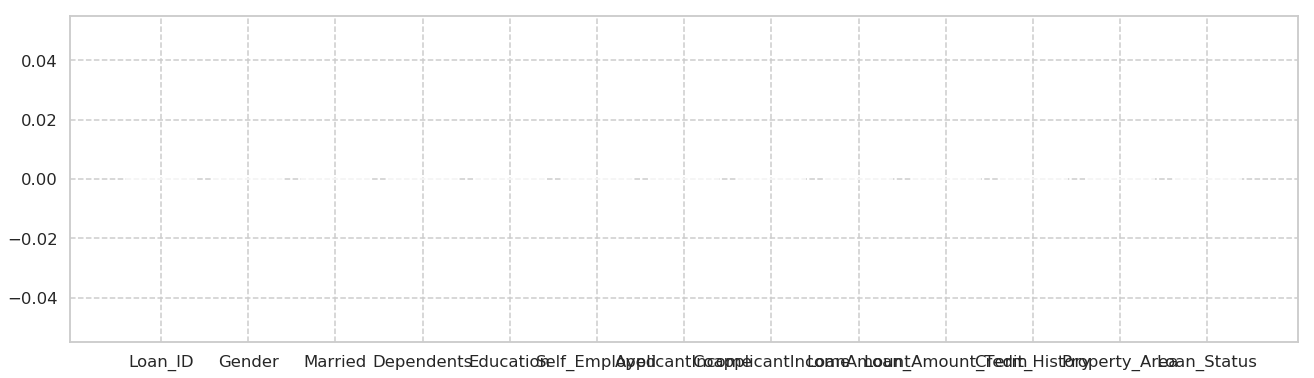

In [217]:
values=list(dataset.apply(lambda x:sum(x.isnull()),axis=0))
colors=['r', 'g', 'b', 'c', 'm','y','r', 'g', 'b', 'c', 'm','y','r']
fig= plt.figure(figsize=(22,6))
plt.bar(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                         'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area',
                        'Loan_Status'], values, color= colors)
fig.show()

In [218]:
#n=int(dataset[5:5+1]['Loan_Status'])
#n
#print(list(dataset['Loan_Status']).count(0))
dataset['Loan_Status'].shape

(614,)

In [219]:
dataset.shape

(614, 13)

In [220]:
dataset.to_csv('loan-prediction1.csv',index=False)
dataset.shape

(614, 13)

In [221]:
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
print(X.shape,y.shape)

(614, 11) (614,)


In [222]:
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2
6,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,2
7,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1
8,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,2
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1


In [223]:
'''#feature selection
#https://scikit-learn.org/stable/modules/feature_selection.html
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=5)
rfe = RFE(dt, 8)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)'''

"#feature selection\n#https://scikit-learn.org/stable/modules/feature_selection.html\n#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html\nfrom sklearn.feature_selection import RFE\nfrom sklearn.tree import DecisionTreeClassifier\ndt = DecisionTreeClassifier(criterion='entropy',random_state=5)\nrfe = RFE(dt, 8)\nrfe = rfe.fit(X,y)\nprint(rfe.support_)\nprint(rfe.ranking_)"

In [224]:
X.shape

(614, 11)

In [225]:
#X_new=rfe.fit_transform(X,y)
#X_new.shape

In [226]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [227]:
'''import pandas as pd
X_df=pd.DataFrame(X_new)
X_df.head()
X_df.to_csv('featured_X_dataframe.csv',index=False)
X_df=pd.read_csv('featured_X_dataframe.csv')
X=X_df
X.head()'''

"import pandas as pd\nX_df=pd.DataFrame(X_new)\nX_df.head()\nX_df.to_csv('featured_X_dataframe.csv',index=False)\nX_df=pd.read_csv('featured_X_dataframe.csv')\nX=X_df\nX.head()"

In [228]:
from sklearn.model_selection import train_test_split
X_train_std,X_test_std,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2017,shuffle=True)

In [229]:
#learning curve plotter
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [230]:
#cross validation and accuracy measures
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

Test set score svm_cls: 0.697297
Classification report for on test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.70      1.00      0.82       129

   micro avg       0.70      0.70      0.70       185
   macro avg       0.35      0.50      0.41       185
weighted avg       0.49      0.70      0.57       185


Confusion matrix for svm_cls_rbf on test:
[[  0  56]
 [  0 129]]
5 fold cross validation


C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.74193548 0.7016129  0.75409836 0.77868852 0.73770492] 0.7428080380750927


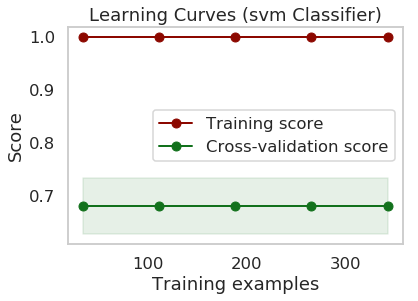

In [231]:
#support vector machine
#https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm 
svm_cls = svm.SVC(gamma=0.05,C=100,kernel='rbf')
svm_cls.fit(X_train_std, y_train)

print("Test set score svm_cls: %f" % svm_cls.score(X_test_std, y_test))
print("Classification report for on test:\n%s\n"% (classification_report(y_test, svm_cls.predict(X_test_std))))
print("Confusion matrix for svm_cls_rbf on test:\n%s" % (confusion_matrix(y_test, svm_cls.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(svm_cls, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(svm_cls,"Learning Curves (svm Classifier)" , X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

Test set score dt: 0.708108
Classification report for dt on test:
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        56
           1       0.77      0.83      0.80       129

   micro avg       0.71      0.71      0.71       185
   macro avg       0.65      0.63      0.63       185
weighted avg       0.69      0.71      0.70       185


Confusion matrix for dt on test:
[[ 24  32]
 [ 22 107]]
5 fold cross validation
[0.77419355 0.65322581 0.71311475 0.74590164 0.71311475] 0.7199101004759386


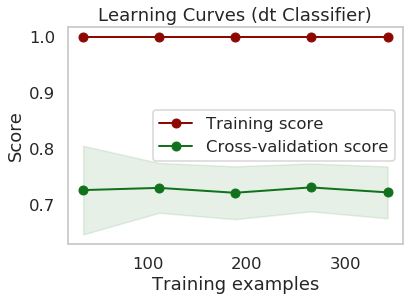

In [232]:
#dt
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',random_state=5)
dt.fit(X_train_std, y_train)

print("Test set score dt: %f" % dt.score(X_test_std, y_test))
print("Classification report for dt on test:\n%s\n"% (classification_report(y_test, dt.predict(X_test_std))))
print("Confusion matrix for dt on test:\n%s" % (confusion_matrix(y_test, dt.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(dt , X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(dt,"Learning Curves (dt Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


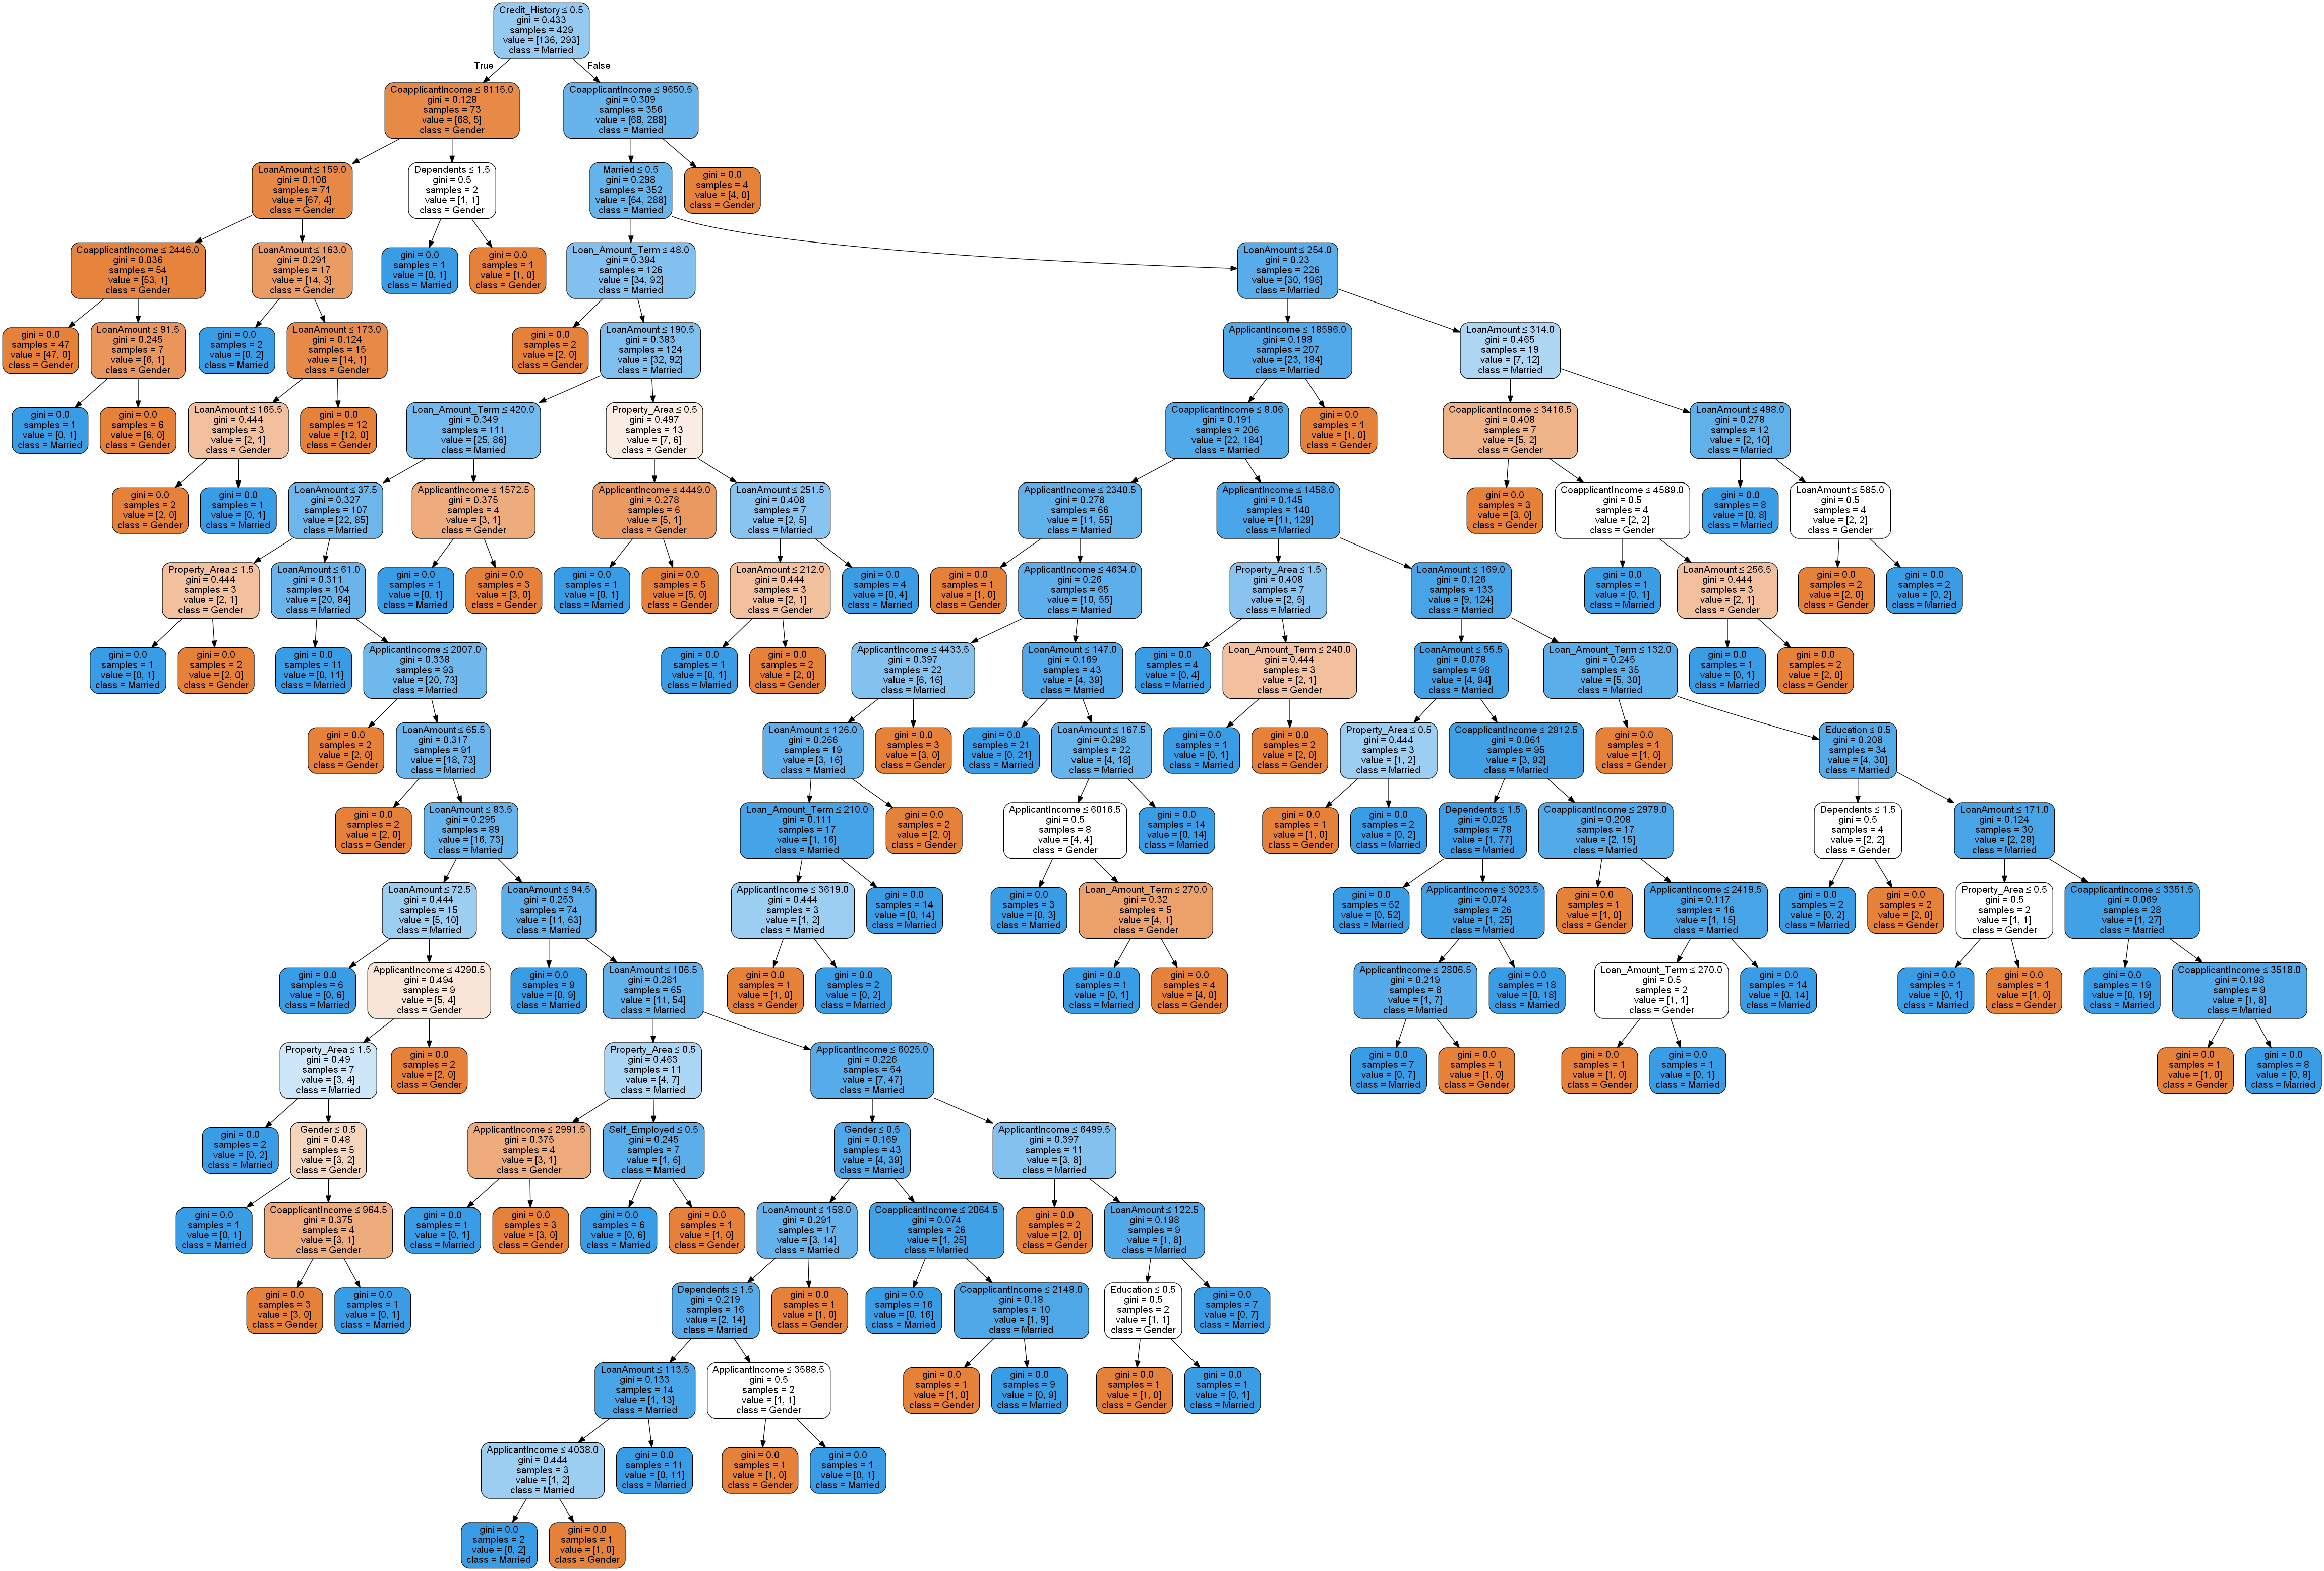

In [233]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree.pdf") 
Image(graph.create_png())

Test set score ada: 0.691892
Classification report for ada on test:
              precision    recall  f1-score   support

           0       0.49      0.41      0.45        56
           1       0.76      0.81      0.79       129

   micro avg       0.69      0.69      0.69       185
   macro avg       0.63      0.61      0.62       185
weighted avg       0.68      0.69      0.68       185


Confusion matrix for ada on test:
[[ 23  33]
 [ 24 105]]
5 fold cross validation
[0.75       0.60483871 0.68852459 0.7295082  0.72131148] 0.6988365943945002


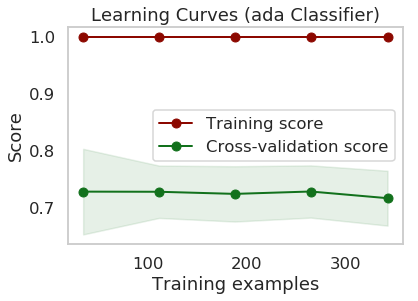

In [234]:
#ada-booster #boosting
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,learning_rate=0.01, random_state=0)
ada.fit(X_train_std, y_train)

print("Test set score ada: %f" % ada.score(X_test_std, y_test))
print("Classification report for ada on test:\n%s\n"% (classification_report(y_test, ada.predict(X_test_std))))
print("Confusion matrix for ada on test:\n%s" % (confusion_matrix(y_test, ada.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(ada , X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(ada,"Learning Curves (ada Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

Test set score rf: 0.762162
Classification report for rf on test:
              precision    recall  f1-score   support

           0       0.77      0.30      0.44        56
           1       0.76      0.96      0.85       129

   micro avg       0.76      0.76      0.76       185
   macro avg       0.77      0.63      0.64       185
weighted avg       0.76      0.76      0.72       185


Confusion matrix for rf on test:
[[ 17  39]
 [  5 124]]
5 fold cross validation
[0.79032258 0.75       0.7704918  0.81147541 0.79508197] 0.783474352194606


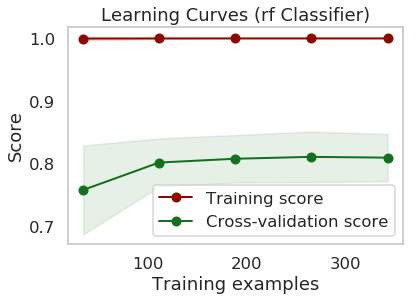

In [235]:
#random forest #baggibg
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=5,max_features='auto')
rf.fit(X_train_std, y_train)

print("Test set score rf: %f" % rf.score(X_test_std, y_test))
print("Classification report for rf on test:\n%s\n"% (classification_report(y_test, rf.predict(X_test_std))))
print("Confusion matrix for rf on test:\n%s" % (confusion_matrix(y_test, rf.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(rf, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(rf,"Learning Curves (rf Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

Test set score mlp: 0.697297
Classification report for mlp on test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.70      1.00      0.82       129

   micro avg       0.70      0.70      0.70       185
   macro avg       0.35      0.50      0.41       185
weighted avg       0.49      0.70      0.57       185


Confusion matrix for mlp on test:
[[  0  56]
 [  0 129]]
5 fold cross validation


C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWa

[0.77419355 0.72580645 0.79508197 0.7704918  0.79508197] 0.7721311475409836


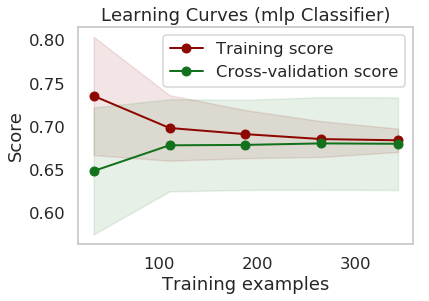

In [236]:
#perceptron #feed forward
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,2), activation='logistic',max_iter=500,learning_rate_init=0.005,tol=1e-41,solver='adam')
mlp.fit(X_train_std, y_train)

print("Test set score mlp: %f" % mlp.score(X_test_std, y_test))
print("Classification report for mlp on test:\n%s\n"% (classification_report(y_test, mlp.predict(X_test_std))))
print("Confusion matrix for mlp on test:\n%s" % (confusion_matrix(y_test, mlp.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(mlp, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(mlp,"Learning Curves (mlp Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


Test set score knn: 0.589189
Classification report for knn on test:
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        56
           1       0.69      0.74      0.71       129

   micro avg       0.59      0.59      0.59       185
   macro avg       0.49      0.49      0.49       185
weighted avg       0.57      0.59      0.58       185


Confusion matrix for knn on test:
[[14 42]
 [34 95]]
5 fold cross validation
[0.76612903 0.75       0.75409836 0.80327869 0.7704918 ] 0.7687995769434162


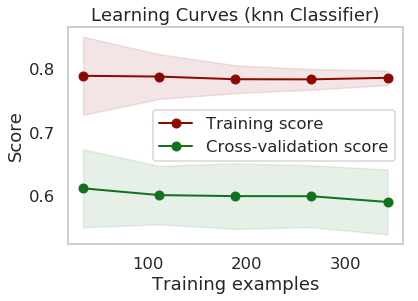

In [237]:
#KNN 5
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN(n_neighbors=3)
knn.fit(X_train_std, y_train)

print("Test set score knn: %f" % knn.score(X_test_std, y_test))
print("Classification report for knn on test:\n%s\n"% (classification_report(y_test, knn.predict(X_test_std))))
print("Confusion matrix for knn on test:\n%s" % (confusion_matrix(y_test, knn.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(knn, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(knn,"Learning Curves (knn Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


Test set score lr: 0.756757
Classification report for lr on test:
              precision    recall  f1-score   support

           0       0.82      0.25      0.38        56
           1       0.75      0.98      0.85       129

   micro avg       0.76      0.76      0.76       185
   macro avg       0.79      0.61      0.62       185
weighted avg       0.77      0.76      0.71       185


Confusion matrix for lr on test:
[[ 14  42]
 [  3 126]]
5 fold cross validation
[0.81451613 0.75806452 0.78688525 0.85245902 0.81147541] 0.8046800634584876


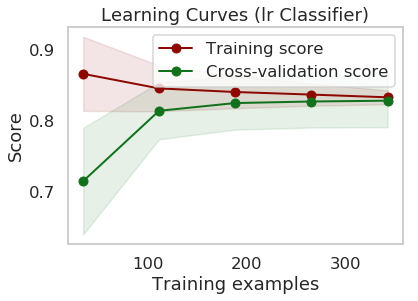

In [238]:
#logistic regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression as LR
lr=LR(C=1.0,solver='newton-cg',penalty='l2',multi_class='ovr',max_iter=500)
lr.fit(X_train_std, y_train)

print("Test set score lr: %f" % lr.score(X_test_std, y_test))
print("Classification report for lr on test:\n%s\n"% (classification_report(y_test, lr.predict(X_test_std))))
print("Confusion matrix for lr on test:\n%s" % (confusion_matrix(y_test, lr.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(lr, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(lr,"Learning Curves (lr Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


In [239]:
#saving models
from sklearn.externals import joblib #dumping and loading model
joblib.dump(svm_cls,'svm_cls_model.joblib')
joblib.dump(dt,'dt_model.joblib')
joblib.dump(ada,'ada_model.joblib')
joblib.dump(mlp,'mlp_model.joblib')
joblib.dump(knn,'knn_model.joblib')
joblib.dump(lr,'lr_model.joblib')
joblib.dump(rf,'rf_model.joblib')

['rf_model.joblib']

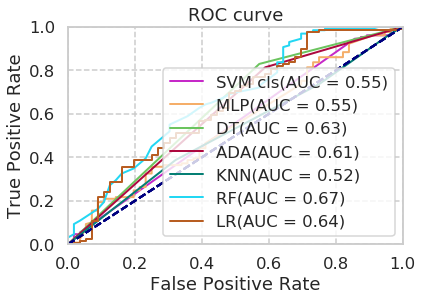

In [240]:
import seaborn as sns
from sklearn import metrics
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

svm_cls_pred=svm_cls.predict(X_test_std)
mlp_pred=mlp.predict(X_test_std)
dt_pred=dt.predict(X_test_std)
ada_pred=ada.predict(X_test_std)
knn_pred=knn.predict(X_test_std)
rf_pred=rf.predict(X_test_std)
lr_pred=lr.predict(X_test_std)


svm_cls_pred_proba=svm_cls.decision_function(X_test_std)
mlp_pred_proba=mlp.predict_proba(X_test_std)[:,1]
dt_pred_proba=dt.predict_proba(X_test_std)[:,1]
ada_pred_proba=ada.predict_proba(X_test_std)[:,1]
knn_pred_proba=knn.predict_proba(X_test_std)[:,1]
rf_pred_proba=rf.predict_proba(X_test_std)[:,1]
lr_pred_proba=lr.predict_proba(X_test_std)[:,1]


plotAUC(y_test,svm_cls_pred_proba,'SVM cls')
plotAUC(y_test,mlp_pred_proba,'MLP')
plotAUC(y_test,dt_pred_proba,'DT')
plotAUC(y_test,ada_pred_proba,'ADA')
plotAUC(y_test,knn_pred_proba,'KNN')
plotAUC(y_test,rf_pred_proba,'RF')
plotAUC(y_test,lr_pred_proba,'LR')
plt.show()

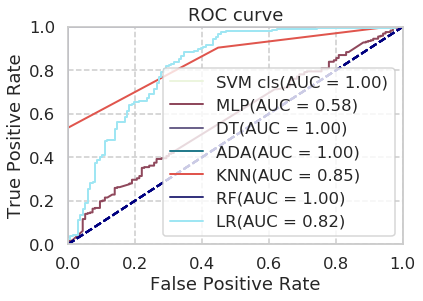

In [241]:
svm_cls_pred=svm_cls.predict(X_train_std)
mlp_pred=mlp.predict(X_train_std)
dt_pred=dt.predict(X_train_std)
ada_pred=ada.predict(X_train_std)
knn_pred=knn.predict(X_train_std)
rf_pred=rf.predict(X_train_std)
lr_pred=lr.predict(X_train_std)


svm_cls_pred_proba=svm_cls.decision_function(X_train_std)
mlp_pred_proba=mlp.predict_proba(X_train_std)[:,1]
dt_pred_proba=dt.predict_proba(X_train_std)[:,1]
ada_pred_proba=ada.predict_proba(X_train_std)[:,1]
knn_pred_proba=knn.predict_proba(X_train_std)[:,1]
rf_pred_proba=rf.predict_proba(X_train_std)[:,1]
lr_pred_proba=lr.predict_proba(X_train_std)[:,1]


plotAUC(y_train,svm_cls_pred_proba,'SVM cls')
plotAUC(y_train,mlp_pred_proba,'MLP')
plotAUC(y_train,dt_pred_proba,'DT')
plotAUC(y_train,ada_pred_proba,'ADA')
plotAUC(y_train,knn_pred_proba,'KNN')
plotAUC(y_train,rf_pred_proba,'RF')
plotAUC(y_train,lr_pred_proba,'LR')
plt.show()

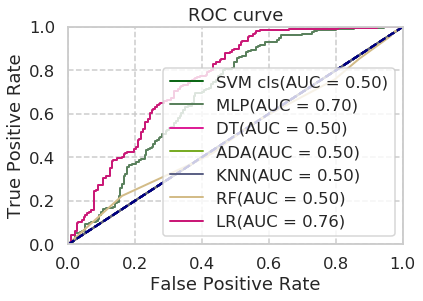

In [242]:
svm_cls_pred=svm_cls.predict(X_std)
mlp_pred=mlp.predict(X_std)
dt_pred=dt.predict(X_std)
ada_pred=ada.predict(X_std)
knn_pred=knn.predict(X_std)
rf_pred=rf.predict(X_std)
lr_pred=lr.predict(X_std)


svm_cls_pred_proba=svm_cls.decision_function(X_std)
mlp_pred_proba=mlp.predict_proba(X_std)[:,1]
dt_pred_proba=dt.predict_proba(X_std)[:,1]
ada_pred_proba=ada.predict_proba(X_std)[:,1]
knn_pred_proba=knn.predict_proba(X_std)[:,1]
rf_pred_proba=rf.predict_proba(X_std)[:,1]
lr_pred_proba=lr.predict_proba(X_std)[:,1]


plotAUC(y,svm_cls_pred_proba,'SVM cls')
plotAUC(y,mlp_pred_proba,'MLP')
plotAUC(y,dt_pred_proba,'DT')
plotAUC(y,ada_pred_proba,'ADA')
plotAUC(y,knn_pred_proba,'KNN')
plotAUC(y,rf_pred_proba,'RF')
plotAUC(y,lr_pred_proba,'LR')
plt.show()

In [243]:
print("Confusion matrix for svm_cls on test:\n%s" % (confusion_matrix(y_test, svm_cls.predict(X_test_std))))
print("Confusion matrix for dt on test:\n%s" % (confusion_matrix(y_test, dt.predict(X_test_std))))
print("Confusion matrix for ada on test:\n%s" % (confusion_matrix(y_test, ada.predict(X_test_std))))
print("Confusion matrix for mlp on test:\n%s" % (confusion_matrix(y_test, mlp.predict(X_test_std))))
print("Confusion matrix for rf on test:\n%s" % (confusion_matrix(y_test, rf.predict(X_test_std))))
print("Confusion matrix for knn on test:\n%s" % (confusion_matrix(y_test, knn.predict(X_test_std))))
print("Confusion matrix for lr on test:\n%s" % (confusion_matrix(y_test, lr.predict(X_test_std))))

Confusion matrix for svm_cls on test:
[[  0  56]
 [  0 129]]
Confusion matrix for dt on test:
[[ 24  32]
 [ 22 107]]
Confusion matrix for ada on test:
[[ 23  33]
 [ 24 105]]
Confusion matrix for mlp on test:
[[  0  56]
 [  0 129]]
Confusion matrix for rf on test:
[[ 17  39]
 [  5 124]]
Confusion matrix for knn on test:
[[14 42]
 [34 95]]
Confusion matrix for lr on test:
[[ 14  42]
 [  3 126]]


In [244]:
print("Confusion matrix for svm_cls on train:\n%s" % (confusion_matrix(y_train, svm_cls.predict(X_train_std))))
print("Confusion matrix for dt on train:\n%s" % (confusion_matrix(y_train, dt.predict(X_train_std))))
print("Confusion matrix for ada on train:\n%s" % (confusion_matrix(y_train, ada.predict(X_train_std))))
print("Confusion matrix for mlp on train:\n%s" % (confusion_matrix(y_train, mlp.predict(X_train_std))))
print("Confusion matrix for rf on train:\n%s" % (confusion_matrix(y_train, rf.predict(X_train_std))))
print("Confusion matrix for knn on train:\n%s" % (confusion_matrix(y_train, knn.predict(X_train_std))))
print("Confusion matrix for lr on train:\n%s" % (confusion_matrix(y_train, lr.predict(X_train_std))))

Confusion matrix for svm_cls on train:
[[136   0]
 [  0 293]]
Confusion matrix for dt on train:
[[136   0]
 [  0 293]]
Confusion matrix for ada on train:
[[136   0]
 [  0 293]]
Confusion matrix for mlp on train:
[[  0 136]
 [  0 293]]
Confusion matrix for rf on train:
[[136   0]
 [  0 293]]
Confusion matrix for knn on train:
[[ 75  61]
 [ 28 265]]
Confusion matrix for lr on train:
[[ 70  66]
 [  6 287]]


In [245]:
print("Confusion matrix for svm_cls on total:\n%s" % (confusion_matrix(y, svm_cls.predict(X_std))))
print("Confusion matrix for dt on total:\n%s" % (confusion_matrix(y, dt.predict(X_std))))
print("Confusion matrix for ada on total:\n%s" % (confusion_matrix(y, ada.predict(X_std))))
print("Confusion matrix for mlp on total:\n%s" % (confusion_matrix(y, mlp.predict(X_std))))
print("Confusion matrix for rf on total:\n%s" % (confusion_matrix(y, rf.predict(X_std))))
print("Confusion matrix for knn on total:\n%s" % (confusion_matrix(y, knn.predict(X_std))))
print("Confusion matrix for lr on total:\n%s" % (confusion_matrix(y, lr.predict(X_std))))

Confusion matrix for svm_cls on total:
[[  0 192]
 [  0 422]]
Confusion matrix for dt on total:
[[192   0]
 [422   0]]
Confusion matrix for ada on total:
[[  0 192]
 [  0 422]]
Confusion matrix for mlp on total:
[[  0 192]
 [  0 422]]
Confusion matrix for rf on total:
[[192   0]
 [422   0]]
Confusion matrix for knn on total:
[[192   0]
 [422   0]]
Confusion matrix for lr on total:
[[192   0]
 [422   0]]


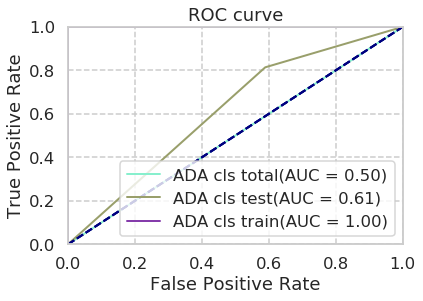

In [246]:
svm_cls_pred_proba_test=ada.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=ada.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=ada.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'ADA cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'ADA cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'ADA cls train')
plt.show()

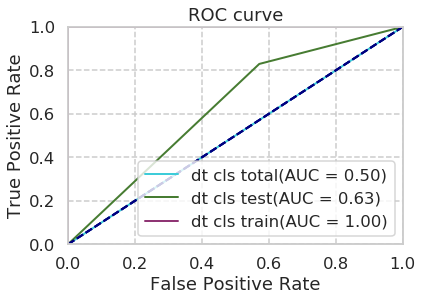

In [247]:


svm_cls_pred_proba_test=dt.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=dt.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=dt.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'dt cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'dt cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'dt cls train')
plt.show()

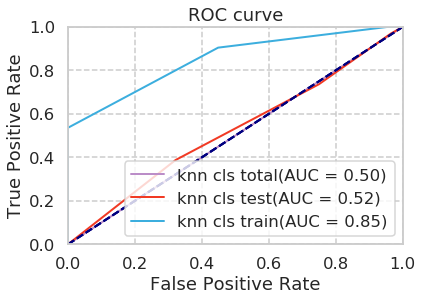

In [248]:
svm_cls_pred_proba_test=knn.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=knn.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=knn.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'knn cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'knn cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'knn cls train')
plt.show()

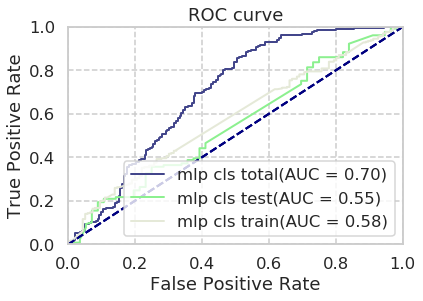

In [249]:
svm_cls_pred_proba_test=mlp.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=mlp.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=mlp.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'mlp cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'mlp cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'mlp cls train')
plt.show()

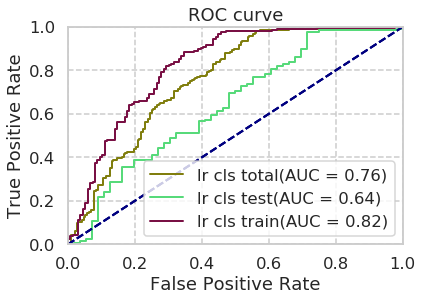

In [250]:
svm_cls_pred_proba_test=lr.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=lr.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=lr.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'lr cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'lr cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'lr cls train')
plt.show()

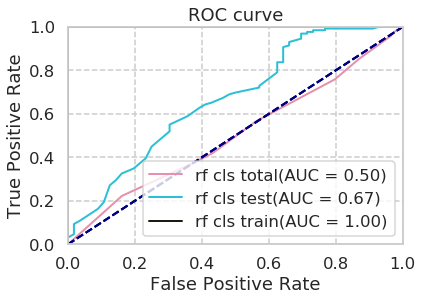

In [251]:
svm_cls_pred_proba_test=rf.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=rf.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=rf.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'rf cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'rf cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'rf cls train')
plt.show()

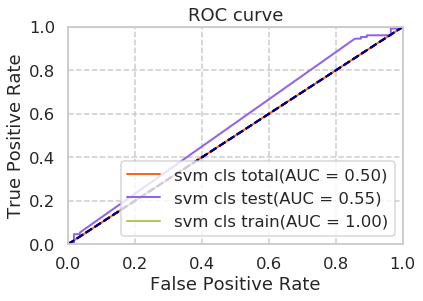

In [252]:
svm_cls_pred_proba_test=svm_cls.decision_function(X_test_std)
svm_cls_pred_proba_train=svm_cls.decision_function(X_train_std)
svm_cls_pred_proba=svm_cls.decision_function(X_std)

plotAUC(y,svm_cls_pred_proba,'svm cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'svm cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'svm cls train')
plt.show()